![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Equações diferenciais

Uma equação diferencial ordinária ("EDO") é dada pelo sistema
$$ \left\{\begin{align}
    f' & = F(t, f) \\
f(t_0) & = f_0.
\end{align}\right.$$
Uma **solução** da EDO é:
- uma função $g$; tal que
- $g(t_0) = f_0$; e
- $g'(t) = F(t, g(t))$.

Por questões práticas, também é comum dar um **intervalo de solução**, ou seja,
pedir que $g$ seja definida (pelo menos) num intervalo $[a,b]$ onde $t_0 \in [a,b]$.
Aqui, vamos usar $a = t_0$,
pensando "fisicamente" que a equação diferencial modela
a evolução de alguma quantidade $f$ que conhecemos agora ($t_0$)
e que queremos saber o quanto restará num momento futuro ($t_f = b$).

Por exemplo, se tomamos $F(t, f) = f$, a EDO pode ser escrita de forma compacta como $f' = f$,
cuja solução é uma função exponencial $f(x) = Ae^x$.
Note que **qualquer** valor de $A$ dá uma solução para a EDO $f' = f$,
e é neste ponto que a segunda equação é importante:
ao fixar $f(t_0) = f_0$, podemos determinar o valor de $A$.

# O método de Euler

Continuando nesta linha, é razoável discretizar o problema da seguinte forma:

1. Definimos uma sequência de pontos $a = t_0 < t_1 < t_2 < \cdots < t_n = t_f = b$ no intervalo $[a,b]$.
2. Como $f$ é derivável, temos a aproximação $f(t_{i+1}) \sim f(t_i) + f'(t_i) \cdot (t_{i+1} - t_i)$.
3. A equação diferencial permide calcular $f'(t_i) = F(t_i, f(t_i))$.
4. Isso define (recursivamente) uma sequência de aproximações para $f(t_j)$ pela fórmula
$$ f _ {j+1} = f_j +  F(t_j, f_j) \cdot (t _ {j+1} - t_j).$$

A sequência mais simples de ser usada é, claro, a de $n+1$ pontos igualmente espaçados no intervalo $[a,b]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Questão 1: Implementação do método de Euler

Escreva a função `euler` que dá uma aproximação numérica para a solução de uma EDO.
Sua função receberá:
- uma função $F$, a "equação diferencial";
- um `float` $t_0$, o tempo inicial;
- um `float` $t_f$, o tempo final;
- um `float` $f_0$, a condição inicial;
- o número $n$ de passos a serem tomados.

Em ambos os casos, a função deve retornar uma **lista** com os valores de $f_j$,
correspondentes às aproximações nos pontos $t_0$, $t_1$, $t_2$, até $t_f$.

In [2]:
def euler(F, t0, tf, f0, nsteps=100):
        h = (tf - t0)/nsteps # Tamanho do intervalor = tj+1 - tj
        pontos = [f0]        # Lista das aproximações
        for i in range(nsteps):
            fi = f0 + F(t0, f0)*h # Aproximação linear para o valor da função fi
            pontos.append(fi)
            f0 = fi
            t0 += h
        return pontos


In [3]:
def F1(t,ft):
    return ft

f_100 = euler(F1, 0, 1, 1)
assert abs(f_100[-1] - 2.704813829421526) < 5e-15
assert len(f_100) == 101

In [4]:
f_100 = euler(F1, 1, 2, 1)
assert abs(f_100[-1] - 2.704813829421526) < 5e-15
assert len(f_100) == 101

Explique porque os testes acima são iguais, apesar de o tempo inicial ser diferente.

Apesar do tempo inicial ser diferente, o tamanho do intervalo $(t_f - t_0)$ é o mesmo, e a condição inicial também $f_0$.

O método de Euler permite resolver equações diferenciais bastante (arbitrariamente!) complicadas:

In [5]:
def F_dificil(t, ft):
    return t*np.sin(ft) - t**2*np.cos(ft)

f_dificil = euler(F_dificil, 0, 2, 1, nsteps=100)
assert np.isclose(f_dificil[50], 1.3280458347260922, atol=5e-15, rtol=5e-15)
assert np.isclose(f_dificil[-1], 3.553673725510754, atol=5e-15, rtol=5e-15)

In [6]:
f_dificil = euler(F_dificil, 0, 2, 1, nsteps=1000)
assert np.isclose(f_dificil[500], 1.337235075671101, atol=5e-15, rtol=5e-15)
assert np.isclose(f_dificil[-1], 3.5844631141202097, atol=5e-15, rtol=5e-15)

Como interpretar as diferenças e similaridades entre os dois testes acima?

YOUR ANSWER HERE

In [7]:
f_dificil = euler(F_dificil, 1, 3, 1, nsteps=1000)
assert len(f_dificil) == 1001
assert np.isclose(f_dificil[-1], 4.373105943363224, atol=5e-15, rtol=5e-15)

## Questão 2: Qualidade da aproximação

Voltamos à equação $f'(t) = f(t)$, cuja solução é a exponencial.

Faça um gráfico da solução numérica $f_{100}$ e da solução exata no intervalo $[0,1]$ no mesmo eixo.

Faça (em outro eixo) o gráfico da **diferença** entre estas soluções.

Text(0.5, 1.0, 'Erro')

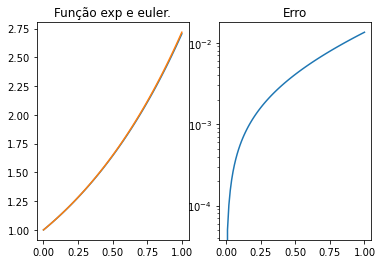

In [8]:
fig, ax = plt.subplots(1, 2)
xs = np.linspace(0, 1, 101)
ax[0].plot(xs, f_100)
ax[0].plot(xs, np.exp(xs))
ax[0].set_title('Função exp e euler.')
ax[1].semilogy(xs, abs(f_100 - np.exp(xs)))
ax[1].set_title('Erro')


## Questão 3: Medindo erros

Mesmo que em muitos casos seja bastante razoável usar o "erro final" $g(t_n) - f_n$,
onde $g$ é a solução exata e $f_n$ a aproximação,
vamos nos concentrar no "erro total".
E, para ficar relativamente simples, vamos usar a média dos valores absolutos das diferenças entre $g(t_j)$ e $f_j$.
Usamos a média, e não a soma, porque ao variar o número de passos esta quantidade se mantém homogênea.

In [9]:
def erro(g, fs, ts):
    """ Calcula o erro entre os valores de fs e g(ts). fs e ts devem ser vetores numpy. """
    return np.mean(abs(g(ts) - fs))

Como o erro médio diminui ao aumentar o número de passos efetuados?
Faça um gráfico.

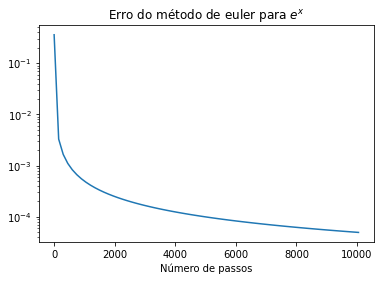

In [10]:

steps = np.arange(1, 10151, 150)
f_n = np.array([euler(F1, 1, 2, 1, i) for i in steps], dtype='object')
erros = []

for i in f_n:
    quantidade = int(len(i))
    pontos = np.linspace(0, 1, quantidade)
    erro1 = erro(np.exp, i, pontos)
    erros.append(erro1)

plt.semilogy(steps, erros)
plt.title('Erro do método de euler para $e^x$')
plt.xlabel('Número de passos')

ax = plt.gca()

In [11]:
assert len(ax.lines) == 1
assert len(ax.get_title()) > 10
assert len(ax.get_xlabel()) > 10

In [12]:
l = ax.lines[0]
xs = l.get_xdata()

assert min(xs) < 100 < 10000 < max(xs)

In [13]:
ax = None

E comente o resultado.

YOUR ANSWER HERE

## Questão 4: Sistemas de Equações

O método de Euler é capaz de resolver (aproximar) **sistemas** de equações diferenciais.

Talvez você tenha que modificar o código da sua função `euler` para que ele seja "vetorial":
- a função pode receber um `np.array` com a condição inicial; e
- a função `F` que for passada deve, também, retornar um `np.array`.

Se for o caso, dê, abaixo, a nova função `euler`:

A função anterior já consegue tratar vetores.

Por exemplo, o sistema
$$ \begin{align}
f_1' & = f_2 \\
f_2' & = -f_1
\end{align} $$
que é equivalente à equação diferencial trigonométrica básica $y'' = -y$,
pode ser simulado assim:

In [14]:
def F2(t, ft):
    return np.array([ft[1],-ft[0]])

ans = np.array([-1.0505597866729235, -0.0010851561020816455])
v   = euler(F2, 0, np.pi, np.array([1,0]), nsteps=100)

assert np.allclose(v[-1], ans, atol=1e-15, rtol=1e-15)

Para usar as coordenadas da solução separadamente, ou seja, $f_1$ e $f_2$,
temos que transpor `v`.
(Note que os métodos constróem ao longo do tempo, e não por coordenadas)

In [15]:
v = np.transpose(v)

### 5. Mais gráficos

Observe que a solução numérica no intervalo $[0, \pi]$ realmente está próxima da solução analítica,
fazendo um gráfico com:
- a função que é solução da EDO,
- a sua derivada;
- a primeira coordenada da solução numérica;
- a segunda coordenada.

Note que, lendo a equação "ao contrário", temos $f_2 = f_1'$, ou seja,
a segunda coordenada está aproximando a derivada da primeira.

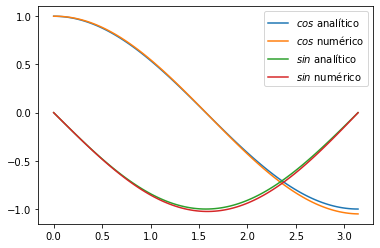

In [16]:
# YOUR CODE HERE
pontos = np.linspace(0, np.pi, 101)

plt.plot(pontos, np.cos(pontos), label='$cos$ analítico')
plt.plot(pontos, v[0], label='$cos$ numérico')

plt.plot(pontos, -np.sin(pontos), label='$sin$ analítico')
plt.plot(pontos, v[1], label='$sin$ numérico')

plt.legend()
ax = plt.gca()

In [17]:
assert len(ax.lines) == 4
assert len(ax.get_legend().texts) == 4

In [18]:
for l in ax.lines:
    xs = l.get_xdata()
    assert np.isclose(0, min(xs))
    assert np.isclose(np.pi, max(xs))

## Questão 6: Erros multidimensionais

Como se comporta o erro no caso do sistema acima, conforme o número de pontos aumenta?
Faça um gráfico.

In [19]:
ax = plt.gca

In [20]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

AttributeError: 'function' object has no attribute 'lines'

Qual erro é mais importante: o da derivada ($f_2$) ou o da função original ($f_1$)?
Você vê uma razão para isso?

YOUR ANSWER HERE

O erro certamente depende do intervalo "de integração" da equação diferencial.
Será que a importância relativa também depende?

Escolha outro intervalo, e faça o gráfico dos erros em função de $n$ para a solução numérica.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Agora, escolha um valor de $n$, e faça o gráfico dos erros:
- uma curva com o erro da primeira coordenada para a função cosseno;
- outra com o erro da segunda coordenada para a derivada do cosseno.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.get_title()) >= 10

E comente

YOUR ANSWER HERE

### Observação: Equações diferenciais e Integrais

Calcular a integral $\int_a^b h(t) dt$ é a mesma coisa que resolver a equação diferencial
$$ \begin{cases}
  f'(t) & = h(t) \\
  f(a)  & = 0,
\end{cases} $$
pelo Teorema Fundamental do Cálculo.
Portanto, é possível implementar o método do retângulo usando a função `euler`.

Isso é verdade para vários métodos de integração: muitas vezes existe um método de Equações Diferenciais cujo caso particular é um método de integração quando a ED é "trivial".